## Analýza BlackRock Inc.
Rozhodl jsem se analyzovat aktiva* pod správou společnosti BlackRock. Cílem této analýzy je porozumět struktuře portfolia společnosti BlackRock a identifikovat klíčové oblasti investic. K tomu použiji datové sady obsahující historická data o akciích a aktuální portfolia společnosti.

*-aktiva = akce v mojem připadě

In [1]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
from tabulate import tabulate

import os
print(os.getcwd())

C:\Users\kostu\ZDA_sem_work


In [2]:
blk_history = pd.read_csv("dataset/BLK Historical Data.csv")
blk_stocks_2022 = pd.read_csv("dataset/blackrock_stocks_2022.csv")

blk_stocks_2022.rename(columns={blk_stocks_2022.columns[0]: 'Number'}, inplace=True)

In [3]:
blk_stocks_2022.head()

,Number,Stock,Sector,Shares Held or Principal Amt,Market Value,% of Portfolio,Previous % of Portfolio,Rank,Change in Shares,% Change,% Ownership,Qtr 1st Owned,Estimated Avg Price Paid,Quarter End Price,Recent Price,Source,Source Date,Date Reported
0,0,AAPL,INFORMATION TECHNOLOGY,"1,027,632,887","$179,434,978,000",4.74,4.61,1,"7,822,596",%,6.3492%,Q3 2007,36.74,174.61,146.35,13F,2022-03-31,2022-05-12
1,1,MSFT,INFORMATION TECHNOLOGY,"523,749,870","$161,477,322,000",4.26,4.44,2,"4,714,236",%,7.0029%,Q3 2007,79.69,308.31,268.40,13F,2022-03-31,2022-05-12
2,2,AMZN,CONSUMER DISCRETIONARY,"582,877,640","$95,007,597,000",2.51,2.44,3,"8,521,600",1%,0.2865%,Q4 2008,"1,126.05",163.00,116.33,13F,2022-03-31,2022-05-12
3,3,BP,ENERGY,"1,950,622,815","$63,141,660,522",1.67,0.01,4,"1,938,847,127","16,464%",60.6448%,-,NaN,NaN,27.78,13G,2022-05-31,2022-05-31
4,4,TSLA,CONSUMER DISCRETIONARY,"55,241,453","$59,528,191,000",1.57,1.42,5,"2,396,458",4%,5.3302%,Q3 2010,288.02,"1,077.60",733.63,13F,2022-03-31,2022-05-12


## Analýza struktury dat

Tabulka obsahuje následující informace:

- **Unnamed: 0**: Pořadové číslo řádku.
- **Stock**: Název akcie.
- **Sector**: Ekonomický sektor.
- **Shares Held or Principal Amt**: Počet držených akcií nebo hlavní částka.
- **Market Value**: Tržní hodnota.
- **% of Portfolio**: Procento z portfolia.
- **Previous % of Portfolio**: Předchozí procento z portfolia.
- **Rank**: Hodnocení.
- **Change in Shares**: Změna počtu akcií.
- **% Change**: Procentuální změna.
- **% Ownership**: Procento vlastnictví.
- **Qtr 1st Owned**: Čtvrtletí prvního vlastnictví.
- **Estimated Avg Price Paid**: Odhadovaná průměrná cena nákupu.
- **Quarter End Price**: Cena na konci čtvrtletí.
- **Recent Price**: Nedávná cena.
- **Source**: Zdroj údajů.
- **Source Date**: Datum zdroje údajů.
- **Date Reported**: Datum zprávy.


## Data cleaning a změna typu dat

In [4]:
blk_stocks_2022 = blk_stocks_2022.drop_duplicates(subset='Stock')
print(f"Count of unics after cleaning: {blk_stocks_2022.shape[0]}")

Count of unics after cleaning: 5962


In [5]:
blk_stocks_2022['Sector'].fillna('Unclassified', inplace=True)
blk_stocks_2022['Market Value'].fillna(0, inplace=True)

portfolio_percentage_sum = blk_stocks_2022['% of Portfolio'].sum()
previous_portfolio_percentage_sum = blk_stocks_2022['Previous % of Portfolio'].sum()
print(f"Summ of % of portfolio: {portfolio_percentage_sum:.2f}%")
print(f"Summ of previous % of portfolio: {previous_portfolio_percentage_sum:.2f}%")

# Replace '$' and ',' with ''

blk_stocks_2022['Shares Held or Principal Amt'] = blk_stocks_2022['Shares Held or Principal Amt'].replace('[\$,]', '', regex=True).astype(float)
blk_stocks_2022['Market Value'] = blk_stocks_2022['Market Value'].replace('[\$,]', '', regex=True).astype(float)

#sum count
shares_held_sum = blk_stocks_2022['Shares Held or Principal Amt'].sum()
market_value_sum = blk_stocks_2022['Market Value'].sum()

#print sum
print("Shares Held or Principal Amt Sum: {:,.0f}".format(shares_held_sum))
print("Market Value Sum: {:,.0f}$".format(market_value_sum))

# Change to 0
blk_stocks_2022['% Ownership'] = blk_stocks_2022['% Ownership'].replace(['N/A', 'No Data', '-'], '0')

# Formatting to float
blk_stocks_2022['% Ownership'] = blk_stocks_2022['% Ownership'].replace('%', '', regex=True).astype(float)

# Преобразование необходимых колонок
blk_stocks_2022['Estimated Avg Price Paid'] = blk_stocks_2022['Estimated Avg Price Paid'].str.replace(',', '').astype(float)
blk_stocks_2022['Quarter End Price'] = blk_stocks_2022['Quarter End Price'].str.replace(',', '').astype(float)
blk_stocks_2022['Recent Price'] = blk_stocks_2022['Recent Price'].str.replace(',', '').astype(float)

blk_stocks_2022['Quarter End Price'] = pd.to_numeric(blk_stocks_2022['Quarter End Price'], errors='coerce')
blk_stocks_2022['Estimated Avg Price Paid'] = pd.to_numeric(blk_stocks_2022['Estimated Avg Price Paid'], errors='coerce')

Summ of % of portfolio: 97.91%
Summ of previous % of portfolio: 97.65%
Shares Held or Principal Amt Sum: 49,417,645,069
Market Value Sum: 3,786,853,379,196$


In [6]:
blk_stocks_2022.head()

,Number,Stock,Sector,Shares Held or Principal Amt,Market Value,% of Portfolio,Previous % of Portfolio,Rank,Change in Shares,% Change,% Ownership,Qtr 1st Owned,Estimated Avg Price Paid,Quarter End Price,Recent Price,Source,Source Date,Date Reported
0,0,AAPL,INFORMATION TECHNOLOGY,1.027633e+09,1.794350e+11,4.74,4.61,1,"7,822,596",%,6.3492,Q3 2007,36.74,174.61,146.35,13F,2022-03-31,2022-05-12
1,1,MSFT,INFORMATION TECHNOLOGY,5.237499e+08,1.614773e+11,4.26,4.44,2,"4,714,236",%,7.0029,Q3 2007,79.69,308.31,268.40,13F,2022-03-31,2022-05-12
2,2,AMZN,CONSUMER DISCRETIONARY,5.828776e+08,9.500760e+10,2.51,2.44,3,"8,521,600",1%,0.2865,Q4 2008,1126.05,163.00,116.33,13F,2022-03-31,2022-05-12
3,3,BP,ENERGY,1.950623e+09,6.314166e+10,1.67,0.01,4,"1,938,847,127","16,464%",60.6448,-,NaN,NaN,27.78,13G,2022-05-31,2022-05-31
4,4,TSLA,CONSUMER DISCRETIONARY,5.524145e+07,5.952819e+10,1.57,1.42,5,"2,396,458",4%,5.3302,Q3 2010,288.02,1077.60,733.63,13F,2022-03-31,2022-05-12



**První graph pairplot pro zjištění nejaké zavislostí**
<br>

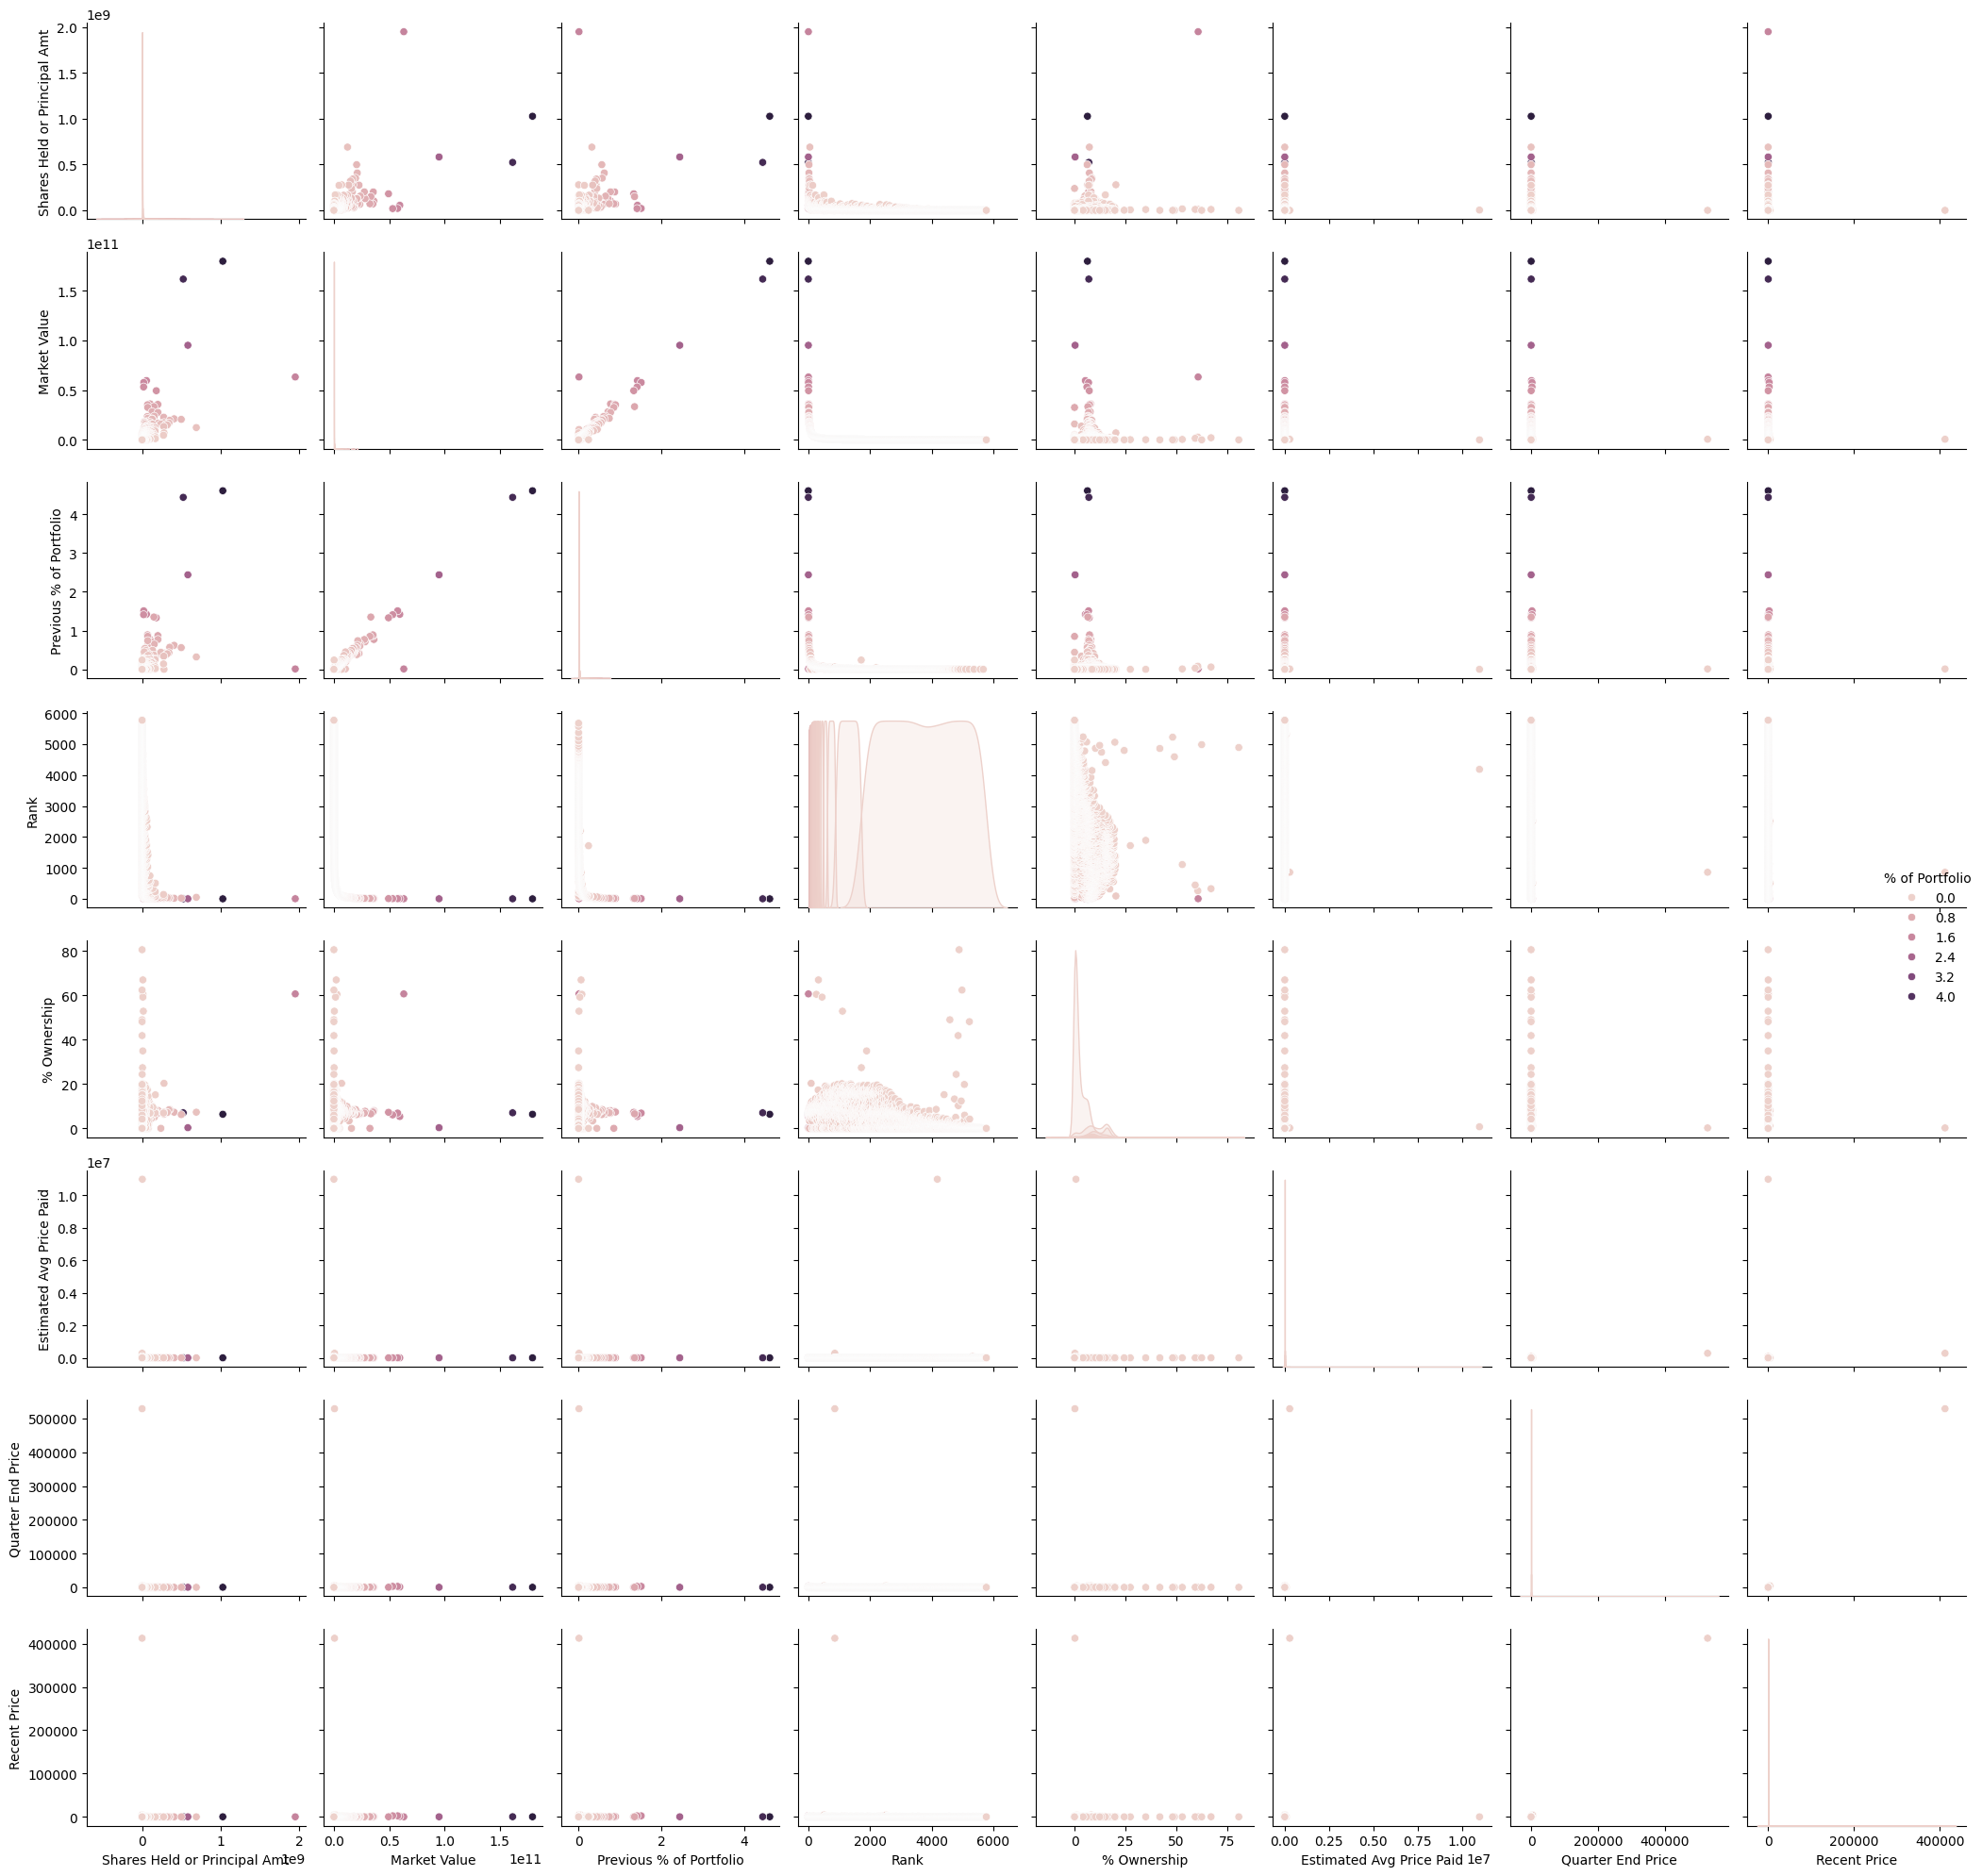

In [7]:
sns.pairplot(blk_stocks_2022.drop(columns=["Number", "Stock"]), hue="% of Portfolio")
plt.tight_layout()

## Tady jsem se rozhodl zjistit, které jsou top 5 společností podle tržní hodnoty jejich akcií přepočtené na aktiva BlackRock v každém sektoru.


In [8]:
# top_companies_by_sector = blk_stocks_2022.groupby('Sector').apply(lambda x: x.nlargest(10, '% of Portfolio')).reset_index(drop=True)
top_companies_by_sector = blk_stocks_2022.groupby('Sector').apply(lambda x: x.nlargest(5, 'Market Value')).reset_index(drop=True)

for sector in top_companies_by_sector['Sector'].unique():
    print(f"\nSector: {sector}")
    sector_market_value_sum = 0
    sector_data = top_companies_by_sector[top_companies_by_sector['Sector'] == sector]
    
    # Формирование данных для табличного вывода
    table_data = []
    for idx, row in sector_data.iterrows():
        table_data.append([row['Stock'], f"{row['% of Portfolio']}%", f"${row['Market Value']:,.0f}"])
        sector_market_value_sum += row['Market Value']
    
    # Вывод таблицы с помощью tabulate
    headers = ['Company', '% of Portfolio', 'Market Value']
    print(tabulate(table_data, headers=headers, tablefmt='pretty'))
    print(f"Total Market Value for top 5 companies in {sector} Sector: ${sector_market_value_sum:,.0f}")
def convert_to_float(column):
    return column.replace(',', '').astype(float)


Sector: COMMUNICATIONS
+---------+----------------+-----------------+
| Company | % of Portfolio |  Market Value   |
+---------+----------------+-----------------+
|  GOOGL  |     1.52%      | $57,580,702,000 |
|  GOOG   |      1.4%      | $53,112,316,000 |
|  META   |     0.88%      | $33,347,618,000 |
|   DIS   |     0.42%      | $16,089,429,000 |
|  CMCSA  |     0.39%      | $14,949,068,000 |
+---------+----------------+-----------------+
Total Market Value for top 5 companies in COMMUNICATIONS Sector: $175,079,133,000

Sector: CONSUMER DISCRETIONARY
+---------+----------------+-----------------+
| Company | % of Portfolio |  Market Value   |
+---------+----------------+-----------------+
|  AMZN   |     2.51%      | $95,007,597,000 |
|  TSLA   |     1.57%      | $59,528,191,000 |
|   HD    |     0.57%      | $21,577,436,000 |
|   MCD   |     0.33%      | $12,463,445,000 |
|   NKE   |     0.32%      | $12,180,110,000 |
+---------+----------------+-----------------+
Total Market Val

In [9]:
blk_stocks_2022['ROI'] = blk_stocks_2022['Quarter End Price'] - blk_stocks_2022['Estimated Avg Price Paid']


top_5_rois = blk_stocks_2022.nlargest(10, 'ROI')

blk_stocks_2022.dropna(subset=['ROI'], inplace=True)

data = top_5_rois[['Rank','Stock', 'Sector', 'Quarter End Price', 'Estimated Avg Price Paid', 'ROI']].values.tolist()

headers = ['Rank','Stock', 'Sector', 'Quarter End Price', 'Estimated Avg Price Paid', 'ROI']

print(tabulate(data, headers=headers, tablefmt='github'))

sector_roi_sum = blk_stocks_2022.groupby('Sector')['ROI'].sum().reset_index()

sector_roi_sum_sorted = sector_roi_sum.sort_values(by='ROI', ascending=False)

print(tabulate(sector_roi_sum_sorted, headers=['Sector', 'Total ROI'], tablefmt='github'))


|   Rank | Stock   | Sector                 |   Quarter End Price |   Estimated Avg Price Paid |       ROI |
|--------|---------|------------------------|---------------------|----------------------------|-----------|
|    859 | BRK.A   | FINANCE                |           528921    |                  279625    | 249296    |
|    512 | NVR     | CONSUMER DISCRETIONARY |             4467.27 |                    2413.01 |   2054.26 |
|      7 | GOOG    | COMMUNICATIONS         |             2792.99 |                     877.37 |   1915.62 |
|      6 | GOOGL   | COMMUNICATIONS         |             2781.35 |                     930.03 |   1851.32 |
|    229 | AZO     | CONSUMER DISCRETIONARY |             2044.58 |                     767.2  |   1277.38 |
|    203 | CMG     | CONSUMER DISCRETIONARY |             1582.03 |                     722.62 |    859.41 |
|      5 | TSLA    | CONSUMER DISCRETIONARY |             1077.6  |                     288.02 |    789.58 |
|    246 | MTD     

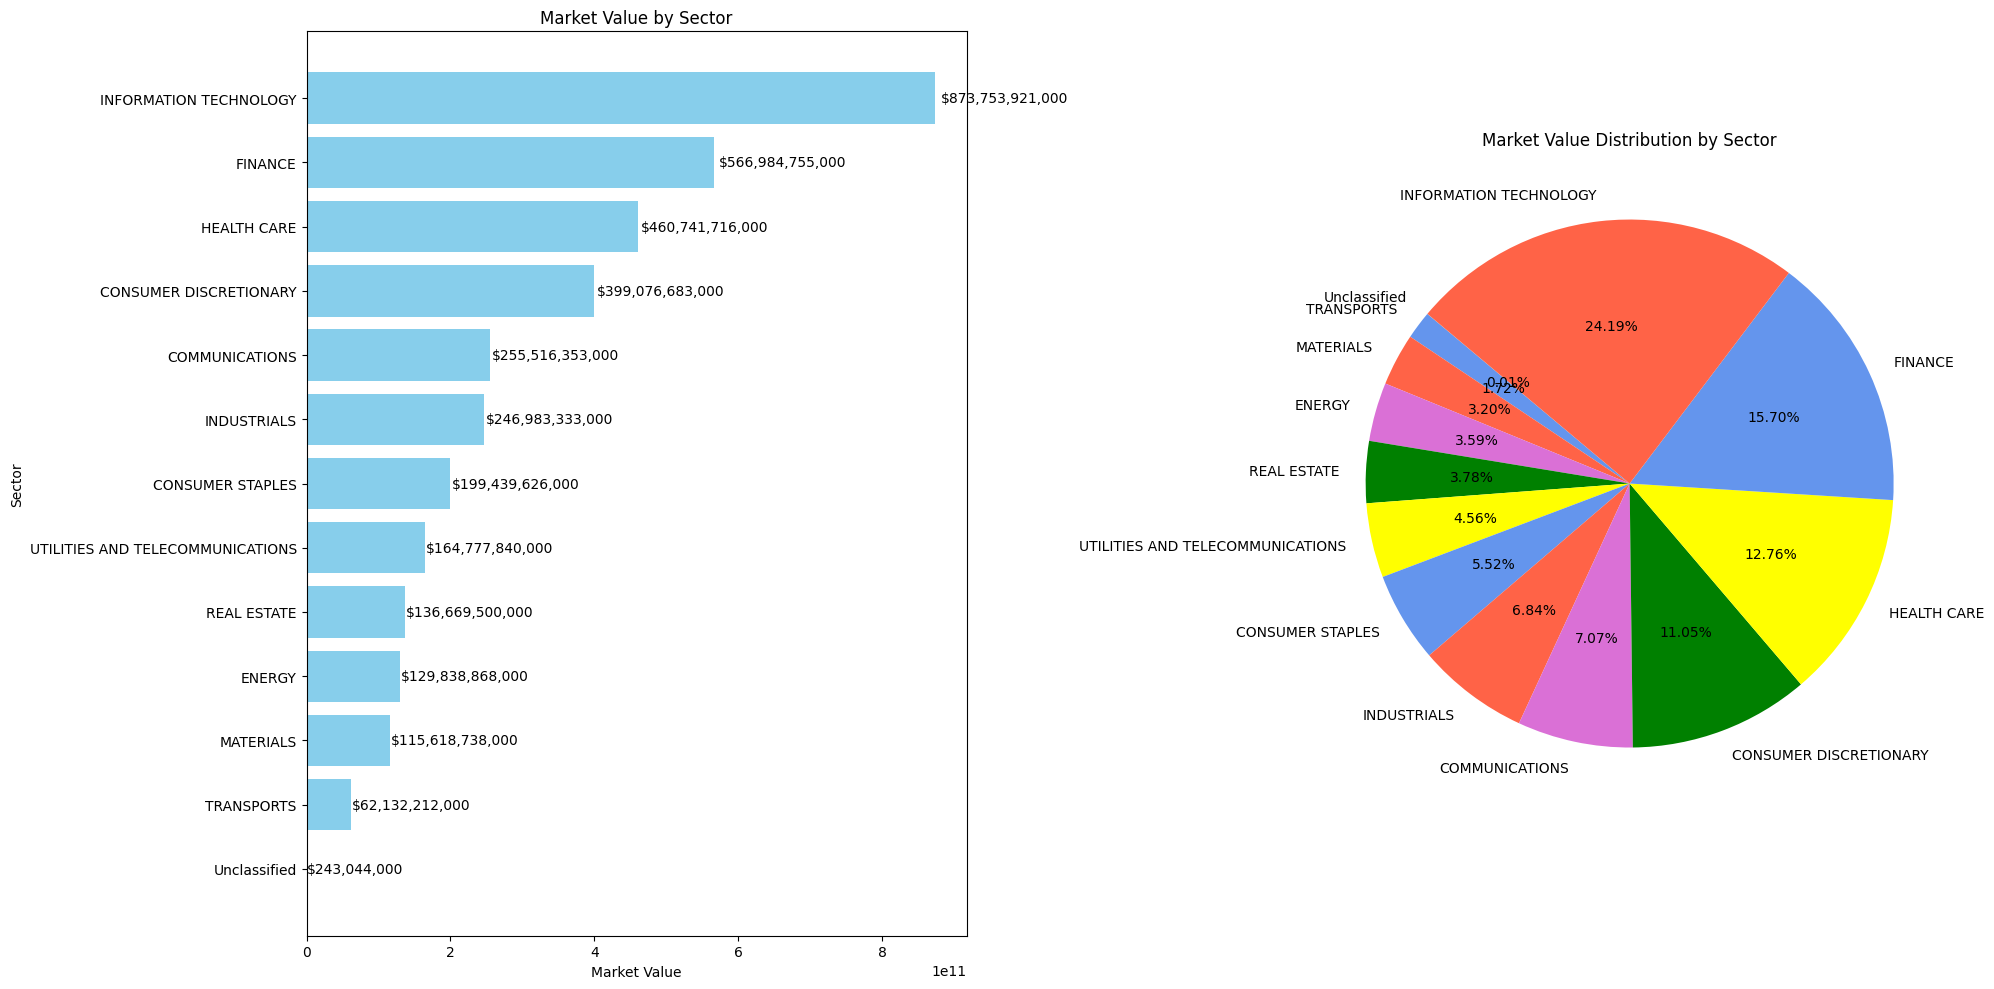

In [10]:
# ascending sort
sector_market_values = blk_stocks_2022.groupby('Sector')['Market Value'].sum().reset_index()
sector_market_values = sector_market_values.sort_values(by='Market Value', ascending=True)

# Настройка графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Построение горизонтальной столбчатой диаграммы
bars = ax1.barh(sector_market_values['Sector'], sector_market_values['Market Value'], color='skyblue')
for bar, value in zip(bars, sector_market_values['Market Value']):
    ax1.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'${value:,.0f}', va='center')
ax1.set_xlabel('Market Value')
ax1.set_ylabel('Sector')
ax1.set_title('Market Value by Sector')

# Построение круговой диаграммы
warm_colors = ['yellow', 'cornflowerblue', 'tomato', 'orchid', 'green']
ax2.pie(sector_market_values['Market Value'], labels=sector_market_values['Sector'], autopct='%1.2f%%', startangle=140, colors=warm_colors)
ax2.set_title('Market Value Distribution by Sector')

# Настройка и отображение графиков
plt.tight_layout()
plt.show()

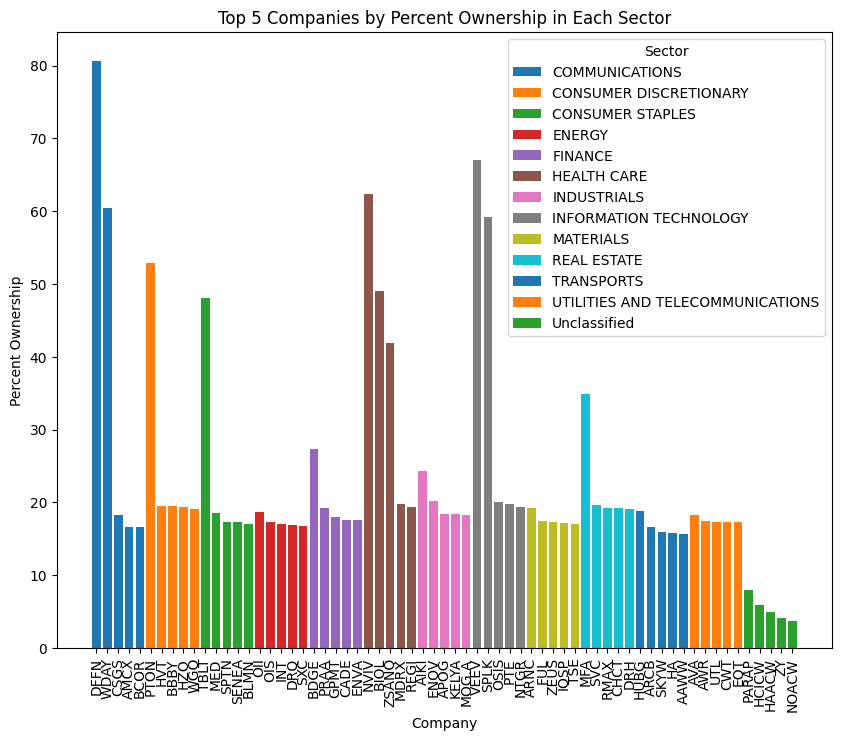

In [11]:
#top 10 companies
top_ownership_companies = blk_stocks_2022.nlargest(10, '% Ownership')[['Stock', 'Sector', '% Ownership']]

# Top 5 companies by %Ownership by Blackrock in each sector
top_companies_by_sector = blk_stocks_2022.groupby('Sector').apply(lambda x: x.nlargest(5, '% Ownership')).reset_index(drop=True)

# Building
fig, ax = plt.subplots(figsize=(10, 8))

# Clustered column diagram
for sector in top_companies_by_sector['Sector'].unique():
    sector_data = top_companies_by_sector[top_companies_by_sector['Sector'] == sector]
    ax.bar(sector_data['Stock'], sector_data['% Ownership'], label=sector)

# Axis
ax.set_xlabel('Company')
ax.set_ylabel('Percent Ownership')
ax.set_title('Top 5 Companies by Percent Ownership in Each Sector')
ax.legend(title='Sector')

plt.xticks(rotation=90)
plt.show()

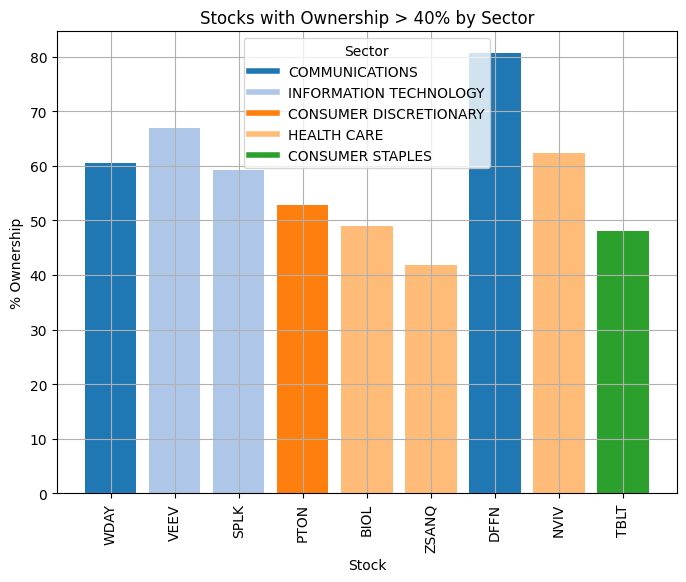

In [12]:
# companies with % ownership > 40
high_ownership_companies = blk_stocks_2022[blk_stocks_2022['% Ownership'] > 40]
table_data = [
    [row['Number'],row['Stock'], f"${row['Market Value']:,.0f}", f"{row['% Ownership']:.2f}%", row['Sector']]
    for _, row in high_ownership_companies.iterrows()
]

# tabulate table
headers = ['Number','Stock', 'Market Value', '% of Portfolio', 'Sector']
# print(tabulate(table_data, headers=headers, tablefmt='pretty'))

sectors = high_ownership_companies['Sector'].unique()
colors = plt.cm.tab20.colors  # Использование набора цветов

# Создание цветовой карты для секторов
sector_color_map = {sector: colors[i % len(colors)] for i, sector in enumerate(sectors)}

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 6))
bars = plt.bar(high_ownership_companies['Stock'], high_ownership_companies['% Ownership'],
               color=[sector_color_map[sector] for sector in high_ownership_companies['Sector']])

# Добавление легенды
legend_labels = [plt.Line2D([0], [0], color=sector_color_map[sector], lw=4) for sector in sectors]
plt.legend(legend_labels, sectors, title="Sector")

# Настройка графика
plt.xlabel('Stock')
plt.ylabel('% Ownership')
plt.title('Stocks with Ownership > 40% by Sector')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [13]:
blk_stocks_2022['Rank'] = pd.to_numeric(blk_stocks_2022['Rank'])

# sort 'Rank'
top_10_companies_by_rank = blk_stocks_2022.sort_values(by='Rank').head(10)

# tabling
table_data = [
    [row['Stock'], row['Rank'], f"{row['% of Portfolio']}%", f"${row['Market Value']:,.0f}", row['Sector'], row['Qtr 1st Owned']]
    for _, row in top_10_companies_by_rank.iterrows()
]

# tabulate
headers = ['Company', 'Rank', '% of Portfolio', 'Market Value', 'Sector', '1st Owned']
print(tabulate(table_data, headers=headers, tablefmt='pretty'))


+---------+------+----------------+------------------+------------------------+-----------+
| Company | Rank | % of Portfolio |   Market Value   |         Sector         | 1st Owned |
+---------+------+----------------+------------------+------------------------+-----------+
|  AAPL   |  1   |     4.74%      | $179,434,978,000 | INFORMATION TECHNOLOGY |  Q3 2007  |
|  MSFT   |  2   |     4.26%      | $161,477,322,000 | INFORMATION TECHNOLOGY |  Q3 2007  |
|  AMZN   |  3   |     2.51%      | $95,007,597,000  | CONSUMER DISCRETIONARY |  Q4 2008  |
|  TSLA   |  5   |     1.57%      | $59,528,191,000  | CONSUMER DISCRETIONARY |  Q3 2010  |
|  GOOGL  |  6   |     1.52%      | $57,580,702,000  |     COMMUNICATIONS     |  Q3 2007  |
|  GOOG   |  7   |      1.4%      | $53,112,316,000  |     COMMUNICATIONS     |  Q2 2014  |
|  NVDA   |  8   |      1.3%      | $49,355,380,000  | INFORMATION TECHNOLOGY |  Q3 2007  |
|  BRK.B  |  9   |     0.95%      | $36,104,748,000  |        FINANCE         | 

In [14]:
quarters_of_interest = ['Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007',
                        'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008']
filtered_data = blk_stocks_2022[blk_stocks_2022['Qtr 1st Owned'].isin(quarters_of_interest)]

# sort 'Market Value'
top_10_by_market_value = filtered_data.sort_values(by='Market Value', ascending=False).head(10)

# Formatting for table output
table_data = [
    [row['Stock'], row['Rank'], row['Qtr 1st Owned'], f"{row['% of Portfolio']}%", f"${row['Market Value']:,.0f}", row['Sector']]
    for _, row in top_10_by_market_value.iterrows()
]

# tabulate
headers = ['Company', 'Rank', 'Qtr 1st Owned', '% of Portfolio', 'Market Value', 'Sector']
print(tabulate(table_data, headers=headers, tablefmt='pretty'))

+---------+------+---------------+----------------+------------------+------------------------+
| Company | Rank | Qtr 1st Owned | % of Portfolio |   Market Value   |         Sector         |
+---------+------+---------------+----------------+------------------+------------------------+
|  AAPL   |  1   |    Q3 2007    |     4.74%      | $179,434,978,000 | INFORMATION TECHNOLOGY |
|  MSFT   |  2   |    Q3 2007    |     4.26%      | $161,477,322,000 | INFORMATION TECHNOLOGY |
|  AMZN   |  3   |    Q4 2008    |     2.51%      | $95,007,597,000  | CONSUMER DISCRETIONARY |
|  GOOGL  |  6   |    Q3 2007    |     1.52%      | $57,580,702,000  |     COMMUNICATIONS     |
|  NVDA   |  8   |    Q3 2007    |      1.3%      | $49,355,380,000  | INFORMATION TECHNOLOGY |
|  BRK.B  |  9   |    Q3 2007    |     0.95%      | $36,104,748,000  |        FINANCE         |
|   JNJ   |  10  |    Q3 2007    |     0.94%      | $35,587,638,000  |      HEALTH CARE       |
|   UNH   |  11  |    Q4 2008    |     0

## Možne předpoklady proč bylo investovano do těchto společností

- <span style="color:red;">Crisis 2008</span>:  [https://en.wikipedia.org/wiki/Great_Recession#:~:text=63][65]-,Housing bubbles,-[edit]](https://en.wikipedia.org/wiki/Great_Recession#:~:text=63%5D%5B65%5D-,Housing%20bubbles,-%5Bedit%5D)

- <span style="color:red;">Apple</span> had iPhone 1 in 2007.

- <span style="color:red;">Microsoft</span> introduced Windows Vista and Microsoft Office 2007

- <span style="color:red;">Amazon</span>
  - 2007 August Product: CreateSpace announces launch of Books on Demand service, which makes it easy for authors who want to self-publish their books to distribute them on [Amazon.com](http://amazon.com/).
  - 2007 August Product: Amazon launches AmazonFresh, a grocery service offering perishable and nonperishable foods.
  - 2007 September 25 Product: Amazon launches Amazon Music, an online music store and music locker.
  - 2007 November 19 Product: Amazon launches the Amazon Kindle.

- <span style="color:red;">Tesla</span> bought factory for model S, created IPO in 2010

- <span style="color:red;">Google</span> bought YouTube in 2007

- Top requests to google in 2007: [https://trends.google.com/trends/yis/2007/GLOBAL/](https://trends.google.com/trends/yis/2007/GLOBAL/) and the 2nd is YouTube, which Google bought in 2006

- <span style="color:red;">Nvidia</span> in 2007: [https://en.wikipedia.org/wiki/Nvidia#:~:text=In July 2002,51][52]](https://en.wikipedia.org/wiki/Nvidia#:~:text=In%20July%202002,51%5D%5B52%5D)

- Warren Edward Buffett and <span style="color:red;">JNJ</span> - i think because of crisis that was predicted, but i can't prove it, so just opinion


In [15]:
filtered_data_1_to_50 = blk_stocks_2022[
    (blk_stocks_2022['Rank'] >= 1) & (blk_stocks_2022['Rank'] <= 100) &
    (blk_stocks_2022['Qtr 1st Owned'].isin(quarters_of_interest))
]

print("Count of companies shares of which where bought in 2007-2008 and now the're top 100 ranked:")
print("Count: " + str(len(filtered_data_1_to_50)))
print("Percent: " + str(len(filtered_data_1_to_50)) + "%")

Count of companies shares of which where bought in 2007-2008 and now the're top 100 ranked:
Count: 79
Percent: 79%


In [16]:
filtered_data_2007 = blk_stocks_2022[blk_stocks_2022['Qtr 1st Owned'].isin(quarters_of_interest)]

total_market_value_2007 = filtered_data_2007['Market Value'].sum()

data = [
    ["Market Value by 2007-2008", "${:,.0f}".format(total_market_value_2007)],
    ["Market Value Sum", "${:,.0f}".format(market_value_sum - total_market_value_2007)],
    ["Total Market Value Sum", "${:,.0f}".format(market_value_sum)]
]

headers = ["Category", "Value"]

print(tabulate(data, headers=headers, tablefmt="grid"))

+---------------------------+--------------------+
| Category                  | Value              |
+===========================+====================+
| Market Value by 2007-2008 | $2,354,041,850,000 |
+---------------------------+--------------------+
| Market Value Sum          | $1,432,811,529,196 |
+---------------------------+--------------------+
| Total Market Value Sum    | $3,786,853,379,196 |
+---------------------------+--------------------+


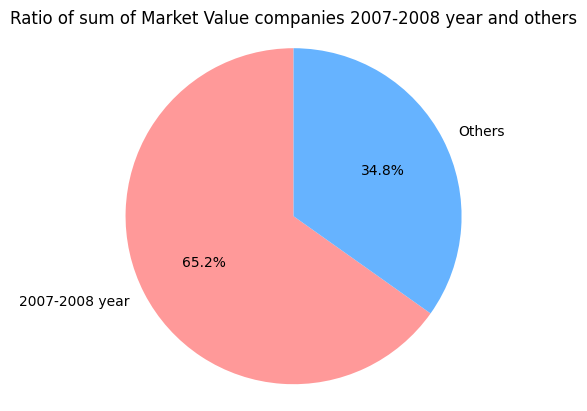

In [17]:

filtered_data_not_2007 = blk_stocks_2022[~blk_stocks_2022['Qtr 1st Owned'].isin(quarters_of_interest)]
total_market_value_not_2007 = filtered_data_not_2007['Market Value'].sum()

labels = ['2007-2008 year', 'Others']
sizes = [total_market_value_2007, total_market_value_not_2007]
colors = ['#ff9999', '#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Ratio of sum of Market Value companies 2007-2008 year and others')
plt.show()

   Estimated Avg Price Paid  Quarter End Price  Recent Price
0                     36.74             174.61        146.35
1                     79.69             308.31        268.40
2                   1126.05             163.00        116.33
4                    288.02            1077.60        733.63
5                    930.03            2781.35       2375.66


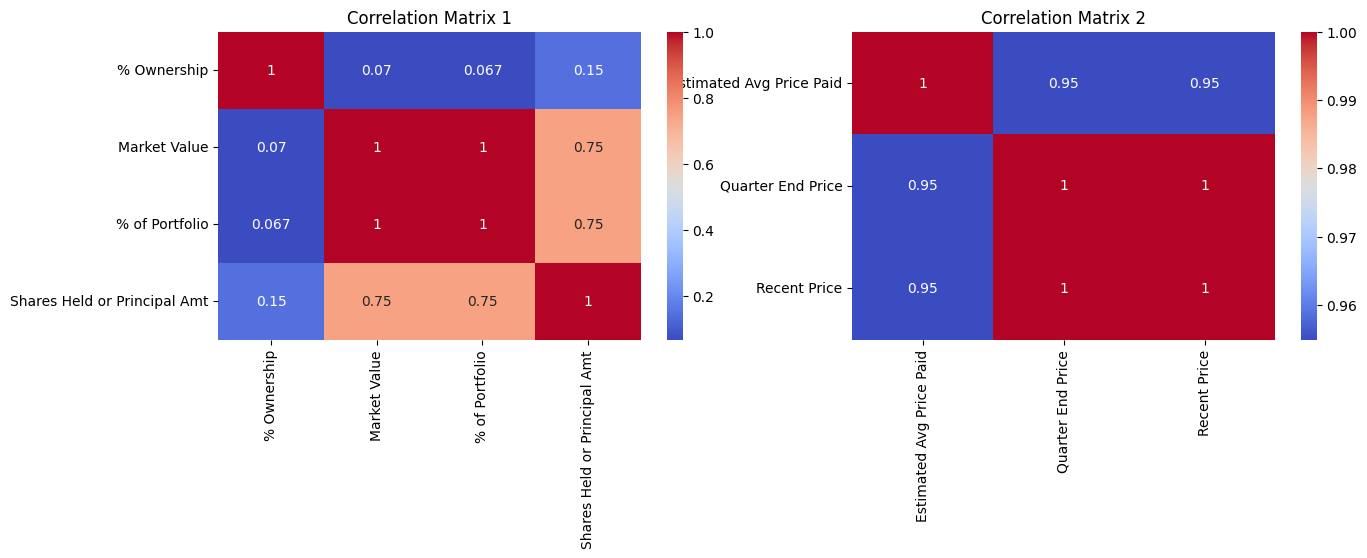

In [18]:
print(blk_stocks_2022[['Estimated Avg Price Paid', 'Quarter End Price', 'Recent Price']].head())

correlation_matrix = blk_stocks_2022[['% Ownership', 'Market Value', '% of Portfolio', 'Shares Held or Principal Amt']].corr()
correlation_matrix1 = blk_stocks_2022[['Estimated Avg Price Paid', 'Quarter End Price', 'Recent Price']].corr()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# First correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title('Correlation Matrix 1')

# Second correlation matrix
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title('Correlation Matrix 2')


plt.show()

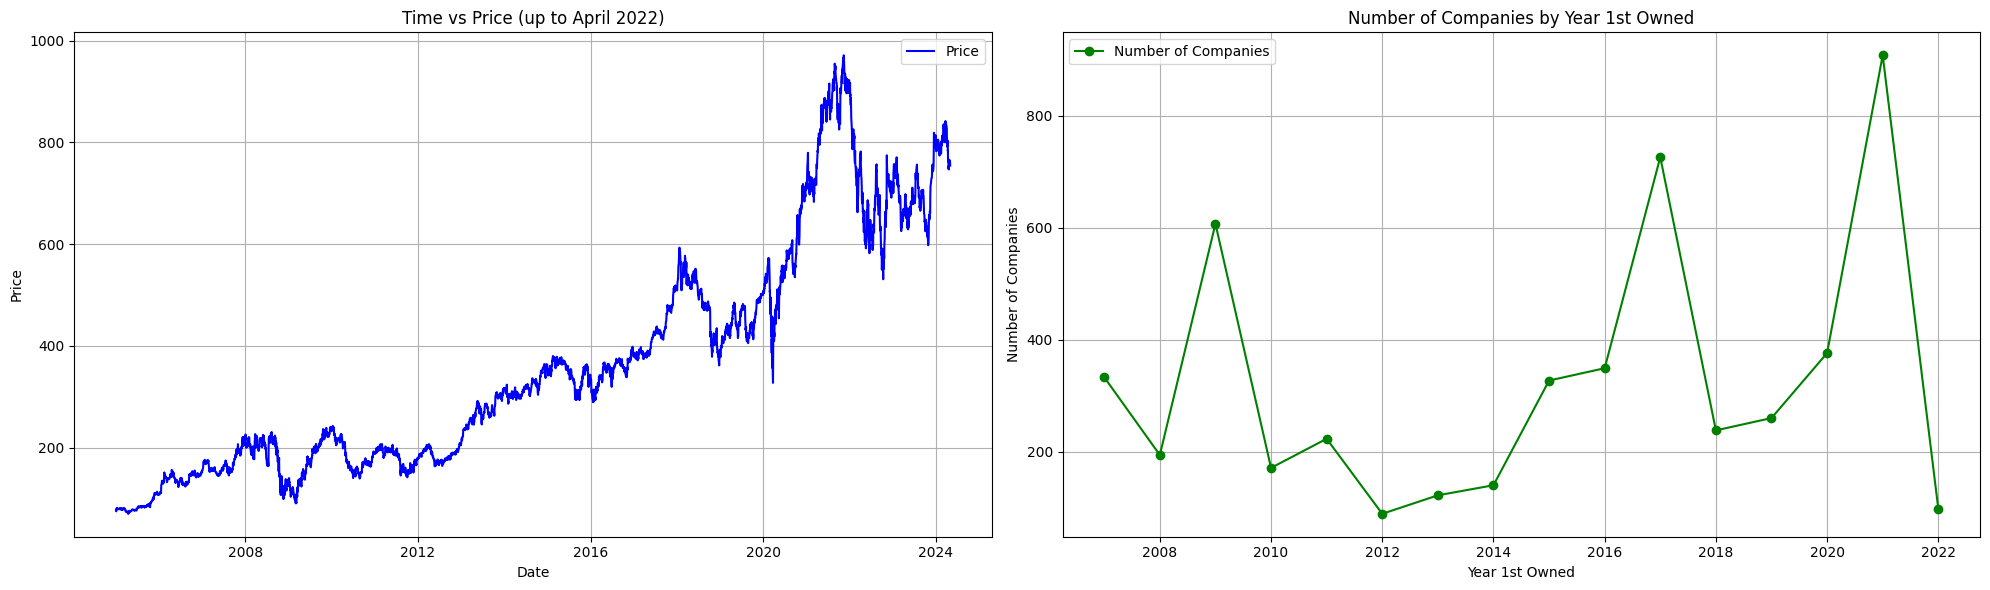

In [19]:
blk_history['Date'] = pd.to_datetime(blk_history['Date'])

# filter 2022 year
blk_history = blk_history[blk_history['Date'] <= '2024-04-30']

# column items to str
blk_stocks_2022['Qtr 1st Owned'] = blk_stocks_2022['Qtr 1st Owned'].astype(str)

# datetime
def convert_to_datetime(quarter_str):
    quarter_mapping = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}
    if quarter_str == '-':
        quarter_str = 'Q1 2000'
    quarter, year = quarter_str.split()
    return f'{year}-{quarter_mapping[quarter]}-01'


blk_stocks_2022['Qtr 1st Owned Date'] = blk_stocks_2022['Qtr 1st Owned'].apply(convert_to_datetime)
blk_stocks_2022['Qtr 1st Owned Date'] = pd.to_datetime(blk_stocks_2022['Qtr 1st Owned Date'])

blk_stocks_2022['Year 1st Owned'] = blk_stocks_2022['Qtr 1st Owned Date'].dt.year

# count
year_counts = blk_stocks_2022['Year 1st Owned'].value_counts().sort_index()

# subgraphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# 1st - Time vs Price
axes[0].plot(blk_history['Date'], blk_history['Price'], label='Price', color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].set_title('Time vs Price (up to April 2022)')
axes[0].legend()
axes[0].grid(True)

# 2nd - Number of Companies by Year 1st Owned
axes[1].plot(year_counts.index, year_counts.values, marker='o', label='Number of Companies', color='green')
axes[1].set_xlabel('Year 1st Owned')
axes[1].set_ylabel('Number of Companies')
axes[1].set_title('Number of Companies by Year 1st Owned')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Závěr analýzy

Na základě poskytnutých poznámek lze učinit následující závěry:

- Nejdražší tržní hodnotu má společnost <span style="color:red;">Apple Inc.</span> s hodnotou <span style="color:red;">&#36;179,434,978,000</span>.
- Nejdražší tržní hodnotu mezi top 5 splolečnosti z každého sektoru je <span style="color:red;">IT</span> Sector: <span style="color:red;">&#36;427,861,342,000</span>
- Nejvýnosnějším sektorem na základě ceny nákupu akcií a jejich současné hodnoty je finanční sektor. Navratnost = <span style="color:red;">259652 (ROI)</span>.
- Největší procento investic je v sektoru <span style="color:red;">IT</span>, což představuje <span style="color:red;">23,27%</span> nebo <span style="color:red;">&#36;881,015,728,881</span> z portfolia.
- Procento <span style="color:red;">top 100</span> společností nyní, jejichž akcie byly nakoupeny v letech <span style="color:red;">2007-2008</span>, je <span style="color:red;">79%</span>.
- Procento tržní hodnoty společností nyní, jejichž akcie byly nakoupeny v letech <span style="color:red;">2007-2008</span>, je <span style="color:red;">62%</span>.
- Tržní hodnota koreluje s procentem portfolia, což znamená, že největší investice směřují do velkých společností. To znamená, že procento portfolia je počítáno podle tržní hodnoty, nikoli podle držených akcií.
- V roce <span style="color:red;">2021</span> společnost BlackRock investovala do <span style="color:red;">1135</span> nových společností, což je největší počet investic do nových společností. Stejně tak v letech <span style="color:red;">2007-2009</span> společnost BlackRock investovala do nových <span style="color:red;">1148</span> společností. V obdobích krizí společnost BlackRock ztrácí hodnotu svých akcií, ale investuje do mnoha nových společností.
